# Predicting cars price with KNN 

This notebook is a challenge from dataquest.io

The objective is to predict a car price based on some features using the KNN model from scikitlearn library

## Data cleaning

Importing packages

In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

Reading the csv without header

In [4]:
cars = pd.read_csv('imports-85.data', header =None)

Defining the dataframe columns

In [5]:
cars.columns = ['symboling','normalized_losses','make',
                            'fuel_type','aspiration','num_doors','body_style',
                            'drive_wheels','engine_location','wheel_base',
                            'length','width','height','curb_weight','engine_type',
                            'num_cylinders','engine_size','fuel_system',
                            'bore','stroke','compression_ratio','horsepower',
                            'peak_rpm','city_mpg','highway_mpg',
                            'price']

In [6]:
cars.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

Selecting only numeric columns to use as a feture or a target for the model

In [8]:
numeric_columns =  ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[numeric_columns]

Replacing all the values '?' with NaN

In [9]:
numeric_cars = numeric_cars.replace('?', np.nan)

Getting information about which columns need to be converted

In [10]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized_losses    164 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 17.7+ KB


Converting columns

In [11]:
numeric_cars['normalized_losses'] = numeric_cars['normalized_losses'].astype(float)
numeric_cars['bore'] = numeric_cars['bore'].astype(float)
numeric_cars['stroke'] = numeric_cars['stroke'].astype(float)
numeric_cars['horsepower'] = numeric_cars['horsepower'].astype(float)
numeric_cars['peak_rpm'] = numeric_cars['peak_rpm'].astype(float)
numeric_cars['price'] = numeric_cars['price'].astype(float)

Verifying null values

In [12]:
numeric_cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Droping all rows with null price, which is the target column 

In [13]:
numeric_cars = numeric_cars.dropna(subset=['price'])

Replacing other null values with the mean, except for the price column

In [14]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [15]:
numeric_cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Normalizing columns

In [16]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

# ML Modeling

In this challenge the objective was to build four ML models using the KNeighborsRegressor
<br>
All models' performance were measured using the root mean squared error metric

This first model uses a static k value
<br>
The three best columns using this default value were 'width', 'highway_mpg' and 'horsepower'

In [17]:
def knn_train_test(train_column, target_column, df):
    np.random.seed(1)
    sample = np.random.rand(len(df)) < 0.8
    train = df[sample]
    test = df[~sample]
    
    knn = KNeighborsRegressor()
    
    knn.fit(train[[train_column]], train[[target_column]])
    
    predictions = knn.predict(test[[train_column]])
    
    rmse = np.sqrt(mean_squared_error(test[target_column], predictions))
    return rmse

feature_columns = numeric_cars.columns.tolist()
feature_columns.remove('price')
rmses = []
for f in feature_columns:
    rmses.append([f,knn_train_test(f, 'price', numeric_cars)])

rmses = pd.DataFrame(rmses)
rmses = rmses.sort_values(by=1)
print(rmses)

                    0            1
3               width  3848.248263
12        highway_mpg  3970.860581
9          horsepower  4373.124211
2              length  4582.829994
5         curb_weight  4611.564641
11           city_mpg  4726.100505
1          wheel_base  6403.920008
6                bore  7288.997130
7              stroke  7495.803664
4              height  7774.073580
8   compression_ratio  8053.535348
0   normalized_losses  8225.035996
10           peak_rpm  8298.644935


This second model accepts a k number for the nearest neighbors

                    0            1  2
5         highway_mpg  3871.465759  5
12              width  4056.590849  5
6          horsepower  4530.910059  5
3         curb_weight  4579.405466  5
7              length  4665.837012  5
1            city_mpg  4687.106821  5
11         wheel_base  5844.008248  5
10             stroke  7479.107580  5
2   compression_ratio  7861.773995  5
4              height  8240.644509  5
0                bore  8243.756473  5
8   normalized_losses  8298.780251  5
9            peak_rpm  8329.605523  5


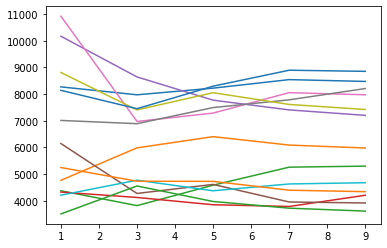

In [23]:
%matplotlib inline
def knn_train_test_k(train_column, target_column, df, k):
    np.random.seed(1)
    sample = np.random.rand(len(df)) < 0.8
    train = df[sample]
    test = df[~sample]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(train[[train_column]], train[[target_column]])
    
    predictions = knn.predict(test[[train_column]])
    
    rmse = np.sqrt(mean_squared_error(test[target_column], predictions))
    return rmse

feature_columns = numeric_cars.columns.tolist()
feature_columns.remove('price')
k_values = [1,3,5,7,9]
rmses = []
for f in feature_columns:
    for k in k_values:
        rmses.append([f,knn_train_test_k(f, 'price', numeric_cars, k), k])

rmses = pd.DataFrame(rmses)
ordered_group = rmses.groupby([0], as_index=False).mean().sort_values(by=1)
print(ordered_group)

rmses_values = rmses.values.tolist()
for f in feature_columns:
    values = []
    ks = []
    for r in rmses_values:
        if r[0] == f:
            values.append(r[1])
            ks.append(r[2])
    plt.plot(ks, values)

The third model accepts a list of feature columns but it uses the default value of n_neighbors
<br>
In this case 4 columns combinations were used. This combinations were the 2, 3, 4 and 5 best columns with the lowest average RMSE, calculated in the last model

In [19]:
def knn_train_test_multiple(train_columns, target_column, df):
    np.random.seed(1)
    sample = np.random.rand(len(df)) < 0.8
    train = df[sample]
    test = df[~sample]
    
    knn = KNeighborsRegressor()
    
    knn.fit(train[train_columns], train[[target_column]])
    
    predictions = knn.predict(test[train_columns])
    
    rmse = np.sqrt(mean_squared_error(test[target_column], predictions))
    return rmse

best_2_feature = ordered_group.iloc[:2][0]
best_3_feature = ordered_group.iloc[:3][0]
best_4_feature = ordered_group.iloc[:4][0]
best_5_feature = ordered_group.iloc[:5][0]
best_features = [best_2_feature, best_3_feature, best_4_feature, best_5_feature]
rmses_multiple = []
count = 2
for b in best_features:
    rmses_multiple.append([count,knn_train_test_multiple(b, 'price', numeric_cars,)])
    count+=1

rmses_multiple = pd.DataFrame(rmses_multiple)
rmses_multiple.sort_values(by=1)

,0,1
1,3,3037.409736
2,4,3077.967988
3,5,3206.875452
0,2,3292.226460


The fourth model accepts a list of feature columns and a value for k
<br>
The best result found was to use the 5 best feature columns with 3 near neighbors

,num_features,k,rmse
77,5,3,2581.162186
2,2,3,2806.288416
78,5,4,2865.699041
1,2,2,2897.922798
76,5,2,2939.571841


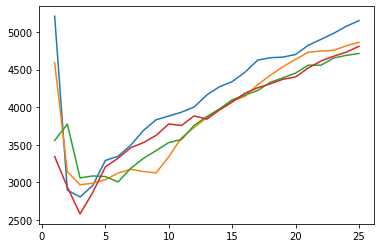

In [20]:
def knn_train_test_multiple_k(train_columns, target_column, df, k):
    np.random.seed(1)
    sample = np.random.rand(len(df)) < 0.8
    train = df[sample]
    test = df[~sample]
    
    knn = KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(train[train_columns], train[[target_column]])
    
    predictions = knn.predict(test[train_columns])
    
    rmse = np.sqrt(mean_squared_error(test[target_column], predictions))
    return rmse

best_2_feature = ordered_group.iloc[:2][0]
best_3_feature = ordered_group.iloc[:3][0]
best_4_feature = ordered_group.iloc[:4][0]
best_5_feature = ordered_group.iloc[:5][0]
best_features = [best_2_feature, best_3_feature, best_4_feature, best_5_feature]
ks = np.arange(1,26)
rmses_best_k = []
count = 2
for b in best_features:
    for k in ks:
        row = [count,k,knn_train_test_multiple_k(b, 'price', numeric_cars,k)]
        rmses_best_k.append(row)
    count+=1
rmses_best_k = pd.DataFrame(rmses_best_k)


rmses_values = rmses_best_k.values.tolist()
count = 2
for b in best_features:
    values = []
    ks = []
    for r in rmses_values:
        if r[0] == count:
            values.append(r[2])
            ks.append(r[1])
    count += 1
    plt.plot(ks, values)

rmses_best_k.columns = ['num_features', 'k', 'rmse']
rmses_best_k.sort_values(by='rmse').head(5)